# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

In [1]:
%pip install pandas
%pip install numpy
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

**Q1.** This question provides some practice cleaning variables which have common problems.

1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [3]:
import os
os.getcwd()

'C:\\Users\\alexl\\AppData\\Local\\Programs\\Microsoft VS Code'

In [4]:
df = pd.read_csv('https://github.com/alaplace17/wrangling_updated/raw/main/assignment/data/airbnb_hw.csv', delimiter=',', on_bad_lines='skip')
print(df.shape, '\n')
df.head(5)

(30478, 13) 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [5]:
price = df['Price']
price.unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [6]:
price = df['Price']
price = price.str.replace(',', '') #replace commas with nothing
print(price.unique(), '\n')

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '47

In [7]:
price = pd.to_numeric(price, errors='coerce') # Change price datatype to float/numeric
print(price.unique(), '\n')

[  145    37    28   199   549   149   250    90   270   290   170    59
    49    68   285    75   100   150   700   125   175    40    89    95
    99   499   120    79   110   180   143   230   350   135    85    60
    70    55    44   200   165   115    74    84   129    50   185    80
   190   140    45    65   225   600   109  1990    73   240    72   105
   155   160    42   132   117   295   280   159   107    69   239   220
   399   130   375   585   275   139   260    35   133   300   289   179
    98   195    29    27    39   249   192   142   169  1000   131   138
   113   122   329   101   475   238   272   308   126   235   315   248
   128    56   207   450   215   210   385   445   136   247   118    77
    76    92   198   205   299   222   245   104   153   349   114   320
   292   226   420   500   325   307    78   265   108   123   189    32
    58    86   219   800   335    63   229   425    67    87  1200   158
   650   234   310   695   400   166   119    62   

In [8]:
print( 'Total missing: ', sum( price.isnull() ) ) # Checks to make sure no null values

Total missing:  0


2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 

In [9]:
url = 'https://github.com/alaplace17/wrangling_updated/blob/main/assignment/data/mn_police_use_of_force.csv?raw=true'
df = pd.read_csv(url)
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [10]:
df.columns.tolist()

['response_datetime',
 'problem',
 'is_911_call',
 'primary_offense',
 'subject_injury',
 'force_type',
 'force_type_action',
 'race',
 'sex',
 'age',
 'type_resistance',
 'precinct',
 'neighborhood']

In [11]:
df['subject_injury'].value_counts()


subject_injury
Yes    1631
No     1446
Name: count, dtype: int64

In [12]:
df['subject_injury'] = df['subject_injury'].fillna('Unknown/Missing')
print(df['subject_injury'].value_counts())

subject_injury
Unknown/Missing    9848
Yes                1631
No                 1446
Name: count, dtype: int64


There are 9848 missing values!

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [13]:
%pip install pyarrow

import pyarrow.parquet as pq

df = pd.read_parquet('https://github.com/alaplace17/wrangling_updated/blob/main/assignment/data/justice_data.parquet?raw=true')
df.head()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [14]:
df.columns.tolist()

['InternalStudyID',
 'REQ_REC#',
 'Defendant_Sex',
 'Defendant_Race',
 'Defendant_BirthYear',
 'Defendant_Age',
 'Defendant_AgeGroup',
 'Defendant_AgeatCurrentArrest',
 'Defendant_AttorneyTypeAtCaseClosure',
 'Defendant_IndigencyStatus',
 'Defendant_RecordedZipCode_eMag',
 'Defendant_VirginiaResidencyStatus',
 'WhetherDefendantWasReleasedPretrial',
 'PretrialReleaseDate',
 'DaysBetweenContactEventAndPretrialRelease',
 'PretrialReleaseType1',
 'PretrialReleaseType2',
 'BondTypeAtInitialContact',
 'BondAmountAtInitialContact',
 'BondTypeAtRelease_v1',
 'BondTypeatRelease_v2',
 'BondAmountAtRelease',
 'WhetherDefendantReceivedPretrialServicesAgencySuperv_PTCC',
 'DaysBetweenReleaseandActivePretrialServicesAgencySupervDate',
 'DaysBetweenPretrialServicesAgencySupervReferralDateandSupervDate',
 'Indicator_PresumptiveDenialOfBail_19.2_120',
 'Indicator_ConditionsToBeReleasedSecuredBond_19.2_123',
 'IfReleasedonSecuredBond_TypeofSurety',
 'Indicator_BailTermSetByCourt_eMag',
 'AdditionalJailT

In [15]:
release = df['WhetherDefendantWasReleasedPretrial']
print(release.unique(), '\n')
print(release.value_counts(), '\n')

[9 0 1] 

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 



In [16]:
release = release.replace(9,np.nan)
print(release.value_counts(), '\n')
sum(release.isnull()) #31 missing values

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64 



31

In [17]:
df['WhetherDefendantWasReleasedPretrial'] = release #replace column with new cleaned values
del release #delete release variable
df['WhetherDefendantWasReleasedPretrial'].value_counts() #check to make sure values are correct 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64

4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [18]:
length = df['ImposedSentenceAllChargeInContactEvent']
type = df['SentenceTypeAllChargesAtConvictionInContactEvent']

print(length.unique() , '\n')

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59.926078

In [19]:
length = pd.to_numeric(length, errors='coerce') # Change values to numeric
length_NA = length.isnull() # Creates missing dummy
print( np.sum(length_NA), '\n') # 9053 missing values

9053 



In [20]:
print(pd.crosstab(length_NA, type), '\n') # Category 4 is cases where charges were dismissed

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274 



In [21]:
length = length.mask( type == 4,0) # Replace missing values with 0 for cases where charges were dismissed
length = length.mask( type == 9, np.nan) # Replace missing values with NaN for cases where sentence type is unknown

In [22]:
length_NA = length.isnull() # Creates new missing dummy
print( pd.crosstab(length_NA, type), '\n')
print( np.sum(length_NA), '\n') # 274 missing

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274 

274 



In [23]:
df['ImposedSentenceAllChargeInContactEvent'] = length # Replace column with cleaned values
del length, type # Destroy temporary vector for length and type
df['ImposedSentenceAllChargeInContactEvent'].value_counts()

ImposedSentenceAllChargeInContactEvent
0.000000      13732
12.000000      1404
0.985626       1051
6.000000        809
3.000000        787
              ...  
2.197125          1
21.164271         1
1.657084          1
2.299795          1
180.985626        1
Name: count, Length: 483, dtype: int64

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [24]:
shark_raw_url_path = 'https://github.com/alaplace17/wrangling_updated/blob/main/assignment/data/GSAF5.xls?raw=true'
df_shark = pd.read_excel(shark_raw_url_path)
df_shark.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_shark = df_shark.dropna(axis=1, how='all')
df_shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_shark.columns.tolist()
print(type(df_shark['Year']), '\n')
df_shark['Year'].unique() 

<class 'pandas.core.series.Series'> 



array([2025., 2024., 2026., 2023., 2022., 2021., 2020., 2019., 2018.,
       2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901.,

In [27]:
df_shark['Year'] = df_shark['Year'].astype('Int64')
df_shark['Year'].unique()
# The values range from present day to 0 which is not possible, probable errors in data entry

<IntegerArray>
[2025, 2024, 2026, 2023, 2022, 2021, 2020, 2019, 2018, 2017,
 ...
 1580, 1555, 1554, 1543, 1518, 1500, 1000,   77,    5,    0]
Length: 262, dtype: Int64

<Axes: title={'center': 'Number of Shark Attacks per Year since 1940'}, xlabel='Year'>

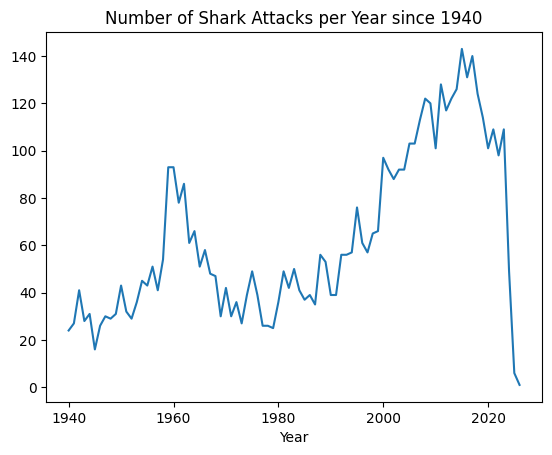

In [28]:
# Filter the rows to focus on attacks since 1940
df_shark_filtered = df_shark[df_shark['Year'] >= 1940]

# Plot the number of attacks per year to see the trend
attacks_per_year = df_shark_filtered['Year'].value_counts().sort_index()
attacks_per_year.plot(kind='line', title='Number of Shark Attacks per Year since 1940')

In [29]:
df_shark['Age'].unique()

array([12, 37, 23, 40, 28, 69, 48, '60+', '?', 57, 24, 45, 61, 27, 38, 16,
       33, 30, 15, 41, 14, 26, 'Middle age', 18, 21, 49, 25, 46, 19, 20,
       65, 64, '13', nan, '11', '46', '32', '29', '10', '64', '62', '39',
       '22', '15', '16', '21', '66', '52', '20', '44', '26', '47', '55',
       '30', '59', '8', '50', '45', '34', '38', '30s', '37', '9', '19',
       '20/30', '35', '65', '20s', '77', '60', '49', '42', '!2', '24',
       '73', '25', '18', '50s', '58', '67', '17', '14', '6', '41', '53',
       '68', '43', '40', '51', '31', 39, 58, 51, 17, 10, 13, 60, '40s',
       68, 35, 62, 'teen', 8, 22, 32, 56, 'Teen', 42, 36, 50, 'M', 9, 11,
       34, '!6', 31, '!!', 47, 55, 7, 71, 59, 53, 54, 75, '45 and 15', 73,
       52, 29, 70, 4, 63, 44, '28 & 22', '22, 57, 31', '60s', "20's", 43,
       67, 74, '9 & 60', 'a minor', 6, 3, 82, 66, 72, '23', '12', '36',
       '63', '71', '48', '70', '18 months', '57', '7', '28', '33', '61',
       '74', '27', '3', '56', '28 & 26', '5', '54

In [30]:
age = df_shark['Age']
age = age.str.replace('s', '') #remove 's' from ages
age = age.str.replace(' ', '')
age = age.str.replace('mid-', '')
age = age.str.replace('mid ', '')
age = age.str.replace('young', '')
age = age.replace('', np.nan)
age = age.replace('nan', np.nan)
age = age.replace('unknown', np.nan)
age = age.replace('?', np.nan)
age = pd.to_numeric(age, errors='coerce') # Convert to numeric
age.unique()
df_shark['Age'] = age # Replace column with cleaned values
del age # Destroy temporary vector for age

In [31]:
%pip install matplotlib
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


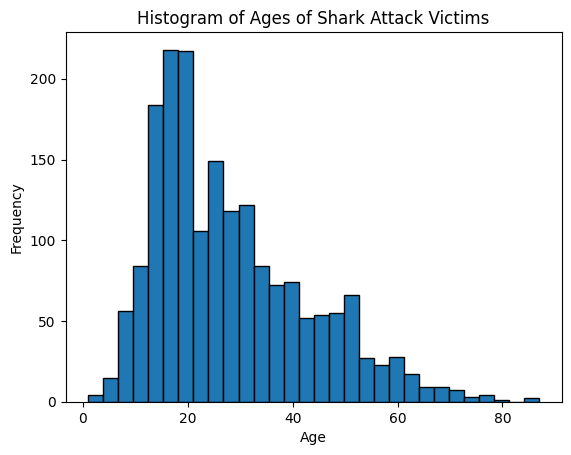

In [32]:
plt.hist(df_shark['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Ages of Shark Attack Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [37]:
df_shark['Sex'].unique()


array(['M', 'F', nan, ' M', 'M ', 'lli', 'M x 2', 'N', '.'], dtype=object)

In [43]:
sex = df_shark['Sex']
sex = sex.replace('M ', 'M')
sex = sex.replace(' M', 'M')
sex = sex.replace('lli', np.nan)
sex = sex.replace('N', np.nan)
sex = sex.replace('.', np.nan)
sex = sex.replace('M x 2', 'M')
sex.unique()
df_shark['Sex'] = sex # Replace column with cleaned values
del sex

In [44]:
sex_counts = df_shark['Sex'].value_counts(normalize=True)
male_proportion = sex_counts.get('M', 0)
print(f"Proportion of males: {male_proportion:.2%}")

Proportion of males: 87.64%


In [52]:
print(df_shark['Type'].unique(), '\n')
print(df_shark['Type'].value_counts(), '\n')

['Unprovoked' 'Provoked' ' Provoked' 'Questionable' 'Watercraft'
 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat'] 

Type
Unprovoked             5153
Provoked                637
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
Unconfirmed               1
?                         1
Unverified                1
Under investigation       1
Name: count, dtype: int64 



In [54]:
type = df_shark['Type']
type = type.replace(' Provoked', 'Provoked')
type = type.replace(('Watercraft','Sea Disaster','Boat'), 'Unprovoked')
type = type.replace(('Questionable','Invalid','Unconfirmed','Unverified','Under investigation', '?'), 'Unknown')
type.unique()
df_shark['Type'] = type # Replace column with cleaned values
del type

In [55]:
unprovoked_proportion = df_shark['Type'].value_counts(normalize=True).get('Unprovoked', 0)
print(f"Proportion of unprovoked attacks: {unprovoked_proportion:.2%}")

Proportion of unprovoked attacks: 82.55%


In [60]:
fatal = df_shark['Fatal Y/N']
fatal = fatal.replace(['F','Nq',2017,'Y x 2','UNKNOWN', 'Unknown', 'unknown', ' N', 'N ', 'y', 'n', 'fatal', 'FATAL', 'M', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025'], 'Unknown')
fatal = fatal.replace([' N', 'N ', 'n'], 'N')
fatal = fatal.replace([' Y', 'y'], 'Y')
fatal = fatal.fillna('Unknown')

df_shark['Fatal Y/N'] = fatal
del fatal
print(df_shark['Fatal Y/N'].value_counts())

Fatal Y/N
N          4872
Y          1468
Unknown     652
Name: count, dtype: int64


In [ ]:
# Cross-tabulate the Type and Sex variables
attack_gender_crosstab = pd.crosstab(df_shark['Type'], df_shark['Sex'], normalize='columns')

# Extract the proportion of unprovoked attacks for each gender
unprovoked_attacks_gender = attack_gender_crosstab.loc['Unprovoked']
print(unprovoked_attacks_gender)
# More likly to launch unprovoked attacks on women

Sex
F    0.873096
M    0.824915
Name: Unprovoked, dtype: float64


In [63]:
# Cross-tabulate the Type and Fatal Y/N variables
fatal_attack_crosstab = pd.crosstab(df_shark['Type'], df_shark['Fatal Y/N'], normalize='index')

# Extract the proportion of fatal attacks for each type
fatal_attack_proportion = fatal_attack_crosstab['Y']
print(fatal_attack_proportion)

# Unprovoked attacks more likely to be fatal

Type
Provoked      0.032864
Unknown       0.020761
Unprovoked    0.248567
Name: Y, dtype: float64


In [ ]:
fatal_sex_crosstab = pd.crosstab(df_shark['Sex'], df_shark['Fatal Y/N'], normalize='index')

# Extract the proportion of fatal attacks for each type
fatal_sex_proportion = fatal_sex_crosstab['Y']
print(fatal_sex_proportion)

# More likely to be fatal for men 

Sex
F    0.151515
M    0.220580
Name: Y, dtype: float64


***I love sharks they are awesome and keystone species!***

In [72]:
print(df_shark['Species '].str.split(), '\n')
white_shark_attacks = df_shark['Species '].str.contains('white', case=False, na=False).sum()
total_attacks = df_shark.shape[0]
white_shark_proportion = white_shark_attacks / total_attacks
print(f"Proportion of attacks by white sharks: {white_shark_proportion:.2%}")

0                                        [Not, stated]
1                                     [Bronze, whaler]
2                                        [Not, stated]
3                 [Reportedly, Tiger, or, Bull, shark]
4       [Great, White, Shart, estimated, 4.8m, 16, ft]
                             ...                      
6987                                               NaN
6988                                               NaN
6989                                               NaN
6990                                               NaN
6991                                               NaN
Name: Species , Length: 6992, dtype: object 

Proportion of attacks by white sharks: 10.67%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  ***This paper is about data tidying and how it is one of the most important aspects of data analysis. The specific structure of a tidy dataset is each variable is acolumn, each observation a row, and each type of observational unit is a table. Principles of tidy data provide standard ways to organise data values within a dataset.***
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  ***It is intended to make initial data cleaning easier because you don't have to start from scratch/reinvent the wheel each time. It is designed to facilitate initial exploration and analysis of the data and to simplify development of data analysis tools that worktogether.***
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  ***The first sentence means that tidy datasets follow a similar structure that allows for ease of analysis, while messy datasets are all uniquely messy and may have very different things wrong with them. The second sentence means that that it is intuitive to understand what a "dataframe/matrix" is made of but that it is harder to fully define what each variable and observation is and this can lead to uninitentional bad choices about cleaning and data organization.***
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  *** A dataset is a collection of values which are numeric or categorical/strings. Every value belogns to both a variable and an observaiton. A variable is a collection of values that measure the same attribute or property and an observation is a collection of values that measure it.***
  5. How is "Tidy Data" defined in section 2.3?
  ***Each variable is a column, each observation is a row, and each type of observational unit is a table. If data is not tidy, it is messy***
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  ***5 Most common problems with messy datasets: 1) Column headers are values, not variable names. 2) Multiple variables are stored in one column. 3) Variables are stored in both rows and columns. 4) Mulitple types of observational units are stored in the same table. 5) A single observational unit is stored in multiple tables. Table 4 is messy becaues the columns are really values of a "hidden" variable, which is income. Since income is actually a variable, you need a new column, income, alongside religion, and then frequency, as in table 6. Now, the columns are all the names of variables, rather than the values that variables take. Melting a dataset is this process of converting column-value variables into rows.***
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  ***Table 11 has days along the top, which are values. Table 12 melts those days into a single variable, date. That still isn't tidy, because the element variable contains variable names and not values --- tmax and tmin are measurements of the same day, which are really names of variables and not values themselves. Table 12(b) is tidy because all the entries are attributes and not variable names.***
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
  ***If tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. This makes it easy to get stuck in a local maxima where independently changing datat structures or data tools will not improve workflow. Wickham hopes that others will build on this framework to develop even better data stroage strategies and better tools.***